#**15/07/2022**

## **CLASSIFICATION BY REGRESSION**

In [ ]:
!pip install -q scikit-plot

In [ ]:
import sys
import io

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scikitplot as skplt


In [ ]:
data=pd.read_csv("https://tinyurl.com/acm15072022")
data.head()

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [ ]:
data.dtypes

ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2066 non-null   int64  
 1   CHURNRISK                  2066 non-null   object 
 2   GENDER                     2063 non-null   object 
 3   STATUS                     2066 non-null   object 
 4   CHILDREN                   2066 non-null   int64  
 5   ESTINCOME                  2066 non-null   float64
 6   HOMEOWNER                  2066 non-null   object 
 7   AGE                        2066 non-null   int64  
 8   TOTALDOLLARVALUETRADED     2066 non-null   float64
 9   TOTALUNITSTRADED           2066 non-null   int64  
 10  LARGESTSINGLETRANSACTION   2066 non-null   float64
 11  SMALLESTSINGLETRANSACTION  2066 non-null   float64
 12  PERCENTCHANGECALCULATION   2066 non-null   float64
 13  DAYSSINCELASTLOGIN         2066 non-null   int64

In [ ]:
data.count()

ID                           2066
CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64

In [ ]:
data.groupby(['CHURNRISK']).size() #groupby in sql

CHURNRISK
High      983
Low       699
Medium    384
dtype: int64

Text(0, 0.5, 'Frequency')

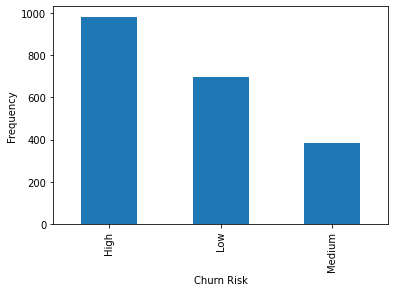

In [ ]:
churn_plot=data['CHURNRISK'].value_counts(sort=True, ascending=False).plot(kind='bar')
churn_plot.set_xlabel('Churn Risk')
churn_plot.set_ylabel('Frequency')

In [ ]:
# drop columns that are of no use
data=data.drop(['ID'], axis=1)
data.head()

,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,Medium,NaN,M,2,28766.9,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,Low,NaN,M,2,91272.2,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,Low,NaN,S,0,73228.3,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,High,M,M,1,64792.3,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,High,F,S,0,93322.1,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950


In [ ]:
# split columns have only finite different types of data into separate columns
# for eg here, gender is m/f, status is s/m/d and homeowner is y/n. as in total there are 7 possibilites for the 3 selected columns, these 3 columns are split into 7 columns with 1 for yes and 0 for no. 
categoricalColumns=['GENDER', 'STATUS', 'HOMEOWNER']
impute_categorical=SimpleImputer(strategy='most_frequent')
onehot_categorical=OneHotEncoder(handle_unknown='ignore')
categorical_transformer=Pipeline(steps=[('impute', impute_categorical), ('onehot',onehot_categorical)])

In [ ]:
# separate columns having only numerical values
numericalColumns=data.select_dtypes(include=[float, int]).columns
scaler_numerical=StandardScaler()
numerical_transformer=Pipeline(steps=[('scale', scaler_numerical)])

In [ ]:
# 
preprocessorforCategoricalColumns=ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)], remainder='passthrough')
temp_data=preprocessorforCategoricalColumns.fit_transform(data)
type(temp_data)

numpy.ndarray

In [ ]:
temp_data=pd.DataFrame(temp_data)
temp_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Medium,2,28766.9,47,6110.61,58,1527.6525,152.76525,8.7,2,13,0.0,152.76525
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Low,2,91272.2,25,26992.7,13,13496.35,1349.635,3.25,4,10,1349.635,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Low,0,73228.3,42,22472.25,28,11236.125,1123.6125,7.0,4,5,1123.6125,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,High,1,64792.3,52,13051.31,36,6525.655,652.5655,9.0,3,6,0.0,652.5655
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,High,0,93322.1,40,29922.99,8,14961.495,1496.1495,2.0,4,9,0.0,1496.1495


In [ ]:
# normalise columns having different values in different ranges
preprocessorforAllColumns=ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns), ('num', numerical_transformer, numericalColumns)], remainder='passthrough')
temp_data2=preprocessorforAllColumns.fit_transform(data)
type(temp_data2)

numpy.ndarray

In [ ]:
temp_data2=pd.DataFrame(temp_data2)
temp_data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.012959,-0.738588,0.281434,-1.011294,-0.010312,-1.168367,-1.168367,-0.332917,-0.602899,0.857719,-0.679273,-0.510607,Medium
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.012959,1.290924,-1.19346,1.094057,-0.790986,1.084439,1.084439,-0.723373,0.732138,0.151724,1.835463,-0.795935,Low
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.3598,0.705049,-0.053769,0.638301,-0.530761,0.659009,0.659009,-0.45471,0.732138,-1.024934,1.414322,-0.795935,Low
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.17342,0.431137,0.616638,-0.311526,-0.391974,-0.227619,-0.227619,-0.311424,0.064619,-0.789603,-0.679273,0.422898,High
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.3598,1.357483,-0.18785,1.389491,-0.877727,1.360216,1.360216,-0.812928,0.732138,-0.083608,-0.679273,1.998506,High


In [ ]:
# drop 'CHURNRISK' from group of all features and import it as a separate label
features=[]
features=data.drop(['CHURNRISK'], axis=1)
label_churn=pd.DataFrame(data, columns=['CHURNRISK'])
label_encoder=LabelEncoder()
label=data['CHURNRISK']
label=label_encoder.fit_transform(label)
label

array([2, 1, 1, ..., 2, 1, 1])

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(features, label, train_size=0.7, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1446, 15)
(620, 15)
(1446,)
(620,)


### **NAIVE BAYES CLASSIFIER**

In [ ]:
# multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
model_name='Naive Bayes Classifier'
nbClassifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nb_model=Pipeline(steps=[('preprocessor', preprocessorforCategoricalColumns), ('classifier', nbClassifier)])
nb_model.fit(x_train, y_train)
y_pred_nb=nb_model.predict(x_test)
for i, j in zip(y_test, y_pred_nb):
  print(str(i)+'\t'+str(j)+'\n')

0	2

0	2

0	2

0	2

0	0

0	2

1	1

0	2

2	2

1	1

0	0

0	2

1	1

1	1

2	2

0	0

0	0

0	2

0	0

1	1

0	2

0	0

1	1

1	1

0	0

0	0

0	2

2	0

2	2

0	2

1	1

0	0

2	2

0	0

1	1

1	2

1	1

1	1

2	2

1	2

1	2

0	2

0	2

1	2

1	1

0	0

1	2

0	2

1	1

1	1

1	2

1	1

0	2

0	2

1	2

0	2

0	2

0	0

2	0

1	1

2	0

1	1

0	2

0	0

0	0

1	1

0	2

0	0

0	2

0	2

0	2

0	0

1	1

2	2

1	2

0	2

0	2

1	1

1	1

0	2

1	1

0	0

2	2

1	1

2	2

1	1

2	0

2	2

2	2

2	2

1	1

2	0

0	0

0	2

0	2

1	2

1	1

1	1

1	1

0	0

1	2

1	1

0	2

0	2

2	2

2	0

1	1

1	1

0	0

1	1

0	2

0	0

1	1

0	0

0	0

0	2

2	2

0	2

0	0

1	1

0	0

0	0

0	0

1	1

1	1

2	2

0	0

2	0

0	2

0	0

2	2

1	1

1	1

1	1

0	0

1	1

0	2

0	2

1	1

0	0

1	1

0	0

0	2

1	1

0	0

0	0

1	2

0	0

0	2

1	1

1	1

0	0

0	2

0	0

0	2

0	0

1	1

0	0

0	0

2	2

0	0

0	0

0	2

0	0

2	2

0	2

1	2

2	2

2	2

0	0

2	2

1	1

1	1

1	2

1	1

2	2

1	1

0	0

1	1

1	1

0	0

1	1

0	0

0	2

1	1

1	1

1	2

2	2

0	2

0	0

0	0

0	0

0	2

0	0

1	1

2	2

0	0

0	0

0	2

1	1



In [ ]:
accuracy_score(y_test, y_pred_nb)

0.667741935483871

In [ ]:
def model_metrics(y_test, y_pred):
  skplt.metrics.plot_confusion_matrix(y_test, y_pred)
  plt.show()

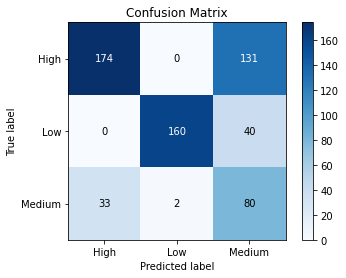

In [ ]:
y_test1=label_encoder.inverse_transform(y_test)
y_pred_nb1=label_encoder.inverse_transform(y_pred_nb)
model_metrics(y_test1, y_pred_nb1)

### **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_name='Logistic Regression Classifier'
logisticregressionClassifier=LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000)
lrc_model=Pipeline(steps=[('preprocessor', preprocessorforCategoricalColumns), ('classifier', logisticregressionClassifier)])
lrc_model.fit(x_train, y_train)
y_pred_lrc=lrc_model.predict(x_test)
for i, j in zip(y_test, y_pred_lrc):
  print(str(i)+'\t'+str(j)+'\n')

0	0

0	0

0	0

0	0

0	0

0	0

1	1

0	0

2	2

1	1

0	0

0	0

1	1

1	1

2	2

0	0

0	0

0	0

0	0

1	1

0	0

0	0

1	1

1	1

0	0

0	0

0	0

2	2

2	2

0	0

1	1

0	0

2	2

0	0

1	1

1	1

1	1

1	1

2	2

1	1

1	1

0	0

0	0

1	1

1	1

0	0

1	1

0	0

1	1

1	1

1	1

1	1

0	0

0	0

1	1

0	0

0	0

0	0

2	2

1	1

2	0

1	1

0	0

0	0

0	0

1	1

0	0

0	0

0	0

0	0

0	0

0	0

1	1

2	2

1	1

0	0

0	0

1	1

1	1

0	0

1	1

0	0

2	2

1	1

2	2

1	1

2	0

2	0

2	2

2	2

1	1

2	2

0	0

0	0

0	0

1	1

1	1

1	1

1	1

0	0

1	1

1	1

0	0

0	0

2	2

2	2

1	1

1	1

0	0

1	1

0	0

0	0

1	1

0	0

0	0

0	0

2	2

0	0

0	0

1	1

0	0

0	0

0	0

1	1

1	1

2	0

0	0

2	2

0	0

0	0

2	2

1	1

1	1

1	1

0	0

1	1

0	0

0	0

1	1

0	0

1	1

0	0

0	0

1	1

0	0

0	0

1	1

0	0

0	0

1	1

1	1

0	0

0	0

0	0

0	0

0	0

1	1

0	0

0	0

2	0

0	0

0	0

0	0

0	0

2	2

0	0

1	1

2	2

2	2

0	0

2	2

1	1

1	1

1	1

1	1

2	0

1	1

0	0

1	1

1	1

0	0

1	1

0	0

0	0

1	1

1	1

1	1

2	2

0	0

0	0

0	0

0	0

0	0

0	0

1	1

2	2

0	0

0	0

0	0

1	1



In [ ]:
accuracy_score(y_test, y_pred_lrc)

0.9548387096774194

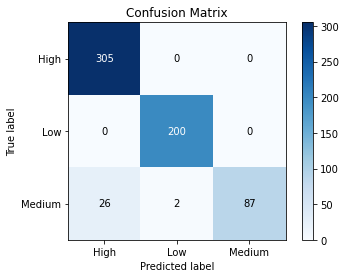

In [ ]:
y_test1=label_encoder.inverse_transform(y_test)
y_pred_lrc1=label_encoder.inverse_transform(y_pred_lrc)
model_metrics(y_test1, y_pred_lrc1)

### **KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_name='K-Nearest Neighbor Classifier'
#knnClassifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knnClassifier=KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
knn_model=Pipeline(steps=[('preprocessorAll', preprocessorforAllColumns), ('classifier', knnClassifier)])
knn_model.fit(x_train, y_train)
y_pred_knn=knn_model.predict(x_test)
for i, j in zip(y_test, y_pred_knn):
  print(str(i)+'\t'+str(j)+'\n')

0	0

0	0

0	0

0	2

0	0

0	0

1	1

0	0

2	2

1	1

0	0

0	0

1	1

1	1

2	2

0	0

0	0

0	0

0	0

1	1

0	0

0	0

1	1

1	1

0	0

0	0

0	0

2	2

2	2

0	0

1	1

0	0

2	0

0	0

1	1

1	1

1	1

1	1

2	2

1	1

1	1

0	0

0	0

1	1

1	1

0	0

1	1

0	0

1	1

1	1

1	1

1	1

0	0

0	2

1	1

0	2

0	0

0	0

2	0

1	1

2	0

1	1

0	0

0	0

0	0

1	1

0	0

0	0

0	0

0	2

0	0

0	0

1	1

2	2

1	1

0	0

0	0

1	1

1	1

0	0

1	1

0	0

2	2

1	1

2	2

1	1

2	0

2	0

2	2

2	2

1	1

2	0

0	0

0	0

0	2

1	1

1	1

1	1

1	1

0	0

1	0

1	1

0	0

0	0

2	2

2	2

1	1

1	1

0	0

1	1

0	0

0	0

1	1

0	0

0	0

0	2

2	2

0	0

0	0

1	1

0	0

0	0

0	0

1	1

1	1

2	0

0	0

2	2

0	0

0	0

2	2

1	1

1	1

1	1

0	0

1	1

0	0

0	0

1	1

0	0

1	1

0	0

0	0

1	1

0	0

0	0

1	1

0	0

0	0

1	1

1	1

0	0

0	0

0	0

0	0

0	0

1	1

0	0

0	0

2	1

0	0

0	0

0	0

0	0

2	2

0	0

1	1

2	2

2	2

0	0

2	2

1	1

1	1

1	1

1	1

2	0

1	1

0	0

1	1

1	1

0	0

1	1

0	0

0	2

1	1

1	1

1	1

2	2

0	0

0	0

0	0

0	0

0	0

0	0

1	1

2	2

0	0

0	0

0	0

1	1



In [ ]:
accuracy_score(y_test, y_pred_knn)

0.882258064516129

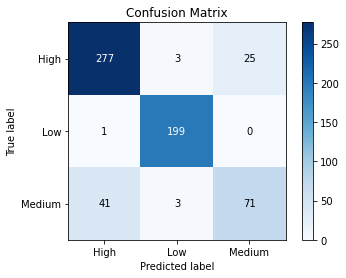

In [ ]:
y_test1=label_encoder.inverse_transform(y_test)
y_pred_knn1=label_encoder.inverse_transform(y_pred_knn)
model_metrics(y_test1, y_pred_knn1)

For the given data, the Logistic Regression Classifier has proved itself to be the best, followed by KNN Classifier followed by the Naive Bayes Classifier.